In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu 
from scipy.stats import shapiro
from scipy.stats import ttest_ind


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تست فرض اول </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [2]:
df = pd.read_csv('df_test1.csv')
df.head()


,Address,province,ur,income
0,21401545208,CharmahalBakhtiari,R,146040000.0
1,21401545211,CharmahalBakhtiari,R,428060000.0
2,21401545214,CharmahalBakhtiari,R,170000000.0
3,21401545217,CharmahalBakhtiari,R,53660000.0
4,21401545217,CharmahalBakhtiari,R,53660000.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [3]:
df.describe()


,Address,income
count,4.491000e+03,4.491000e+03
mean,1.571316e+10,2.793771e+09
std,4.953224e+09,7.240888e+09
min,1.140117e+10,1.446000e+07
25%,1.140218e+10,5.725250e+08
50%,1.140818e+10,1.294710e+09
75%,2.140455e+10,2.564405e+09
max,2.140955e+10,1.672000e+11


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Address   4491 non-null   int64  
 1   province  4491 non-null   object 
 2   ur        4491 non-null   object 
 3   income    4491 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 140.5+ KB


In [5]:
df['ur'].unique()


array(['R', 'U'], dtype=object)

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> جدا سازی افراد شهری و روستایی</div>


In [6]:
province_filter = df['province'] == 'CharmahalBakhtiari'
urban_data = df[(province_filter) & (df['ur'] == 'U')]
rural_data = df[(province_filter) & (df['ur'] == 'R')]


In [7]:
urban_data['income'].describe()


count    2.556000e+03
mean     3.487725e+09
std      9.111320e+09
min      2.100000e+07
25%      5.995400e+08
50%      1.500130e+09
75%      3.113710e+09
max      1.672000e+11
Name: income, dtype: float64

In [8]:
rural_data['income'].describe()


count    1.935000e+03
mean     1.877106e+09
std      3.251737e+09
min      1.446000e+07
25%      5.373350e+08
50%      1.146230e+09
75%      1.974250e+09
max      3.728418e+10
Name: income, dtype: float64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار مقایسه توزیع درآمد بین افراد شهری و روستایی</div>


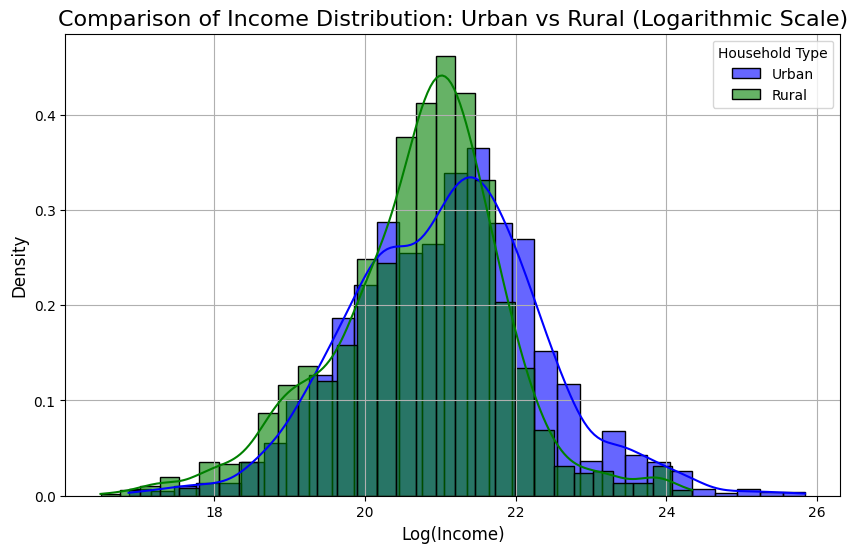

In [9]:
plt.figure(figsize=(10,6))
urban_income_log = np.log1p(urban_data['income'])
rural_income_log = np.log1p(rural_data['income'])
sns.histplot(urban_income_log, color='blue', kde=True, label='Urban', stat='density', bins=30, alpha=0.6)
sns.histplot(rural_income_log, color='green', kde=True, label='Rural', stat='density', bins=30, alpha=0.6)
plt.title('Comparison of Income Distribution: Urban vs Rural (Logarithmic Scale)', fontsize=16)
plt.xlabel('Log(Income)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Household Type")
plt.grid(True)
plt.show()


- <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;">  برای اینکه داده های پرت تاثیر چندانی روی نمایش نمودار توزیع نداشته باشند از مقیاس لاگ استفاده شده</div>


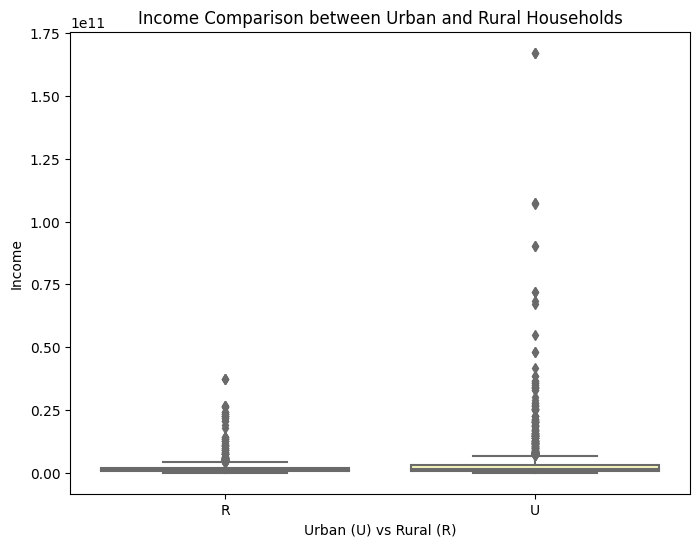

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ur', y='income', data=df[df['province'] == 'CharmahalBakhtiari'], palette='Set3')
plt.title('Income Comparison between Urban and Rural Households')
plt.xlabel('Urban (U) vs Rural (R)')
plt.ylabel('Income')
plt.show()


In [11]:
t_stat, p_value = stats.ttest_ind(urban_data['income'], rural_data['income'], equal_var=False)

print(f"T-statistic: {t_stat}") 
print(f"P-value: {p_value}")


T-statistic: 8.26845642820047
P-value: 1.9315084811718738e-16


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> گزارش آزمون فرض</div>


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که آیا درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری برابر است یا خیر. برای این منظور، از آزمون t دو نمونه‌ای مستقل استفاده کردیم. نتایج این آزمون به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (T-statistic):</strong> <span style="color: #e74c3c;">8.27</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">1.93e-16</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که فرض بیان شده رد می‌شود. به عبارت دیگر، اختلاف معنی‌داری بین میانگین درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری وجود دارد.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (T-statistic) نیز نشان می‌دهد که اختلاف میانگین درآمد خانوارهای شهری و روستایی بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که درآمد خانوارهای شهری به طور قابل توجهی بیشتر از درآمد خانوارهای روستایی است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری برابر نیستند و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تست فرض دوم </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [12]:
df_test2 = pd.read_csv('df_test2.csv')
df_test2.head()


,Address,value,ur
0,20011395420,1000000,R
1,20011395420,20000,R
2,20011395420,350000,R
3,20011395420,200000,R
4,20001385412,1500000,R


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا</div>


In [13]:
df_test2.describe()


,Address,value
count,6.189580e+05,6.189580e+05
mean,1.596606e+10,3.013850e+06
std,5.010112e+09,8.609204e+06
min,1.000100e+10,2.000000e+03
25%,1.140217e+10,2.100000e+05
50%,1.271134e+10,4.000000e+05
75%,2.111553e+10,1.800000e+06
max,2.300671e+10,8.000000e+08


In [14]:
df_test2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618958 entries, 0 to 618957
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Address  618958 non-null  int64 
 1   value    618958 non-null  int64 
 2   ur       618958 non-null  object
dtypes: int64(2), object(1)
memory usage: 14.2+ MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> جدا سازی افراد شهری و روستایی</div>


In [15]:
house_R = df_test2[df_test2['ur'] == 'R']
house_U = df_test2[df_test2['ur'] == 'U']


In [16]:
house_R.head()


,Address,value,ur
0,20011395420,1000000,R
1,20011395420,20000,R
2,20011395420,350000,R
3,20011395420,200000,R
4,20001385412,1500000,R


In [17]:
house_U.head()


,Address,value,ur
275960,10004004223,8000000,U
275961,10004004223,200000,U
275962,10004004223,100000,U
275963,10004004223,400000,U
275964,10004004223,200000,U


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار مقایسه توزیع درآمد بین افراد شهری و روستایی</div>


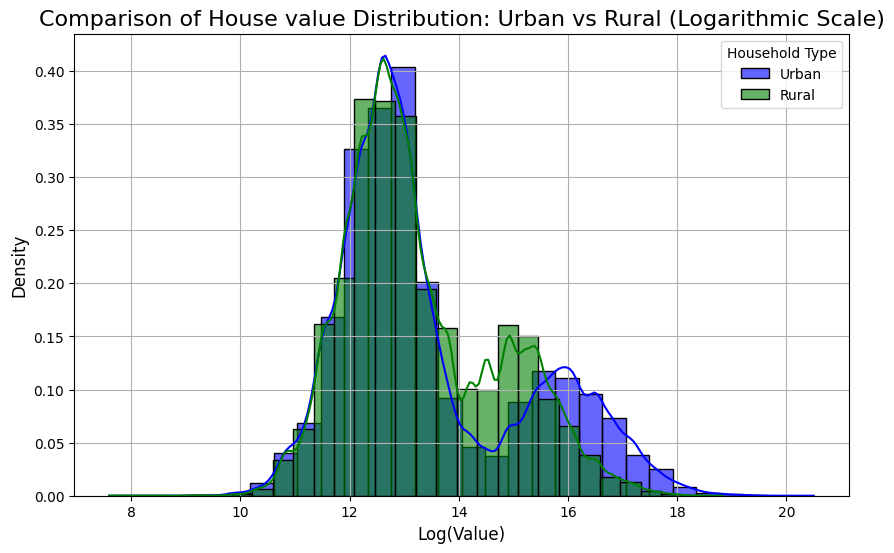

In [18]:
plt.figure(figsize=(10,6))
urban_income_log = np.log1p(house_U['value'])
rural_income_log = np.log1p(house_R['value'])
sns.histplot(urban_income_log, color='blue', kde=True, label='Urban', stat='density', bins=30, alpha=0.6)
sns.histplot(rural_income_log, color='green', kde=True, label='Rural', stat='density', bins=30, alpha=0.6)
plt.title('Comparison of House value Distribution: Urban vs Rural (Logarithmic Scale)', fontsize=16)
plt.xlabel('Log(Value)', fontsize=12)
plt.ylabel('Density', fontsize=12) 
plt.legend(title="Household Type") 
plt.grid(True)
plt.show()


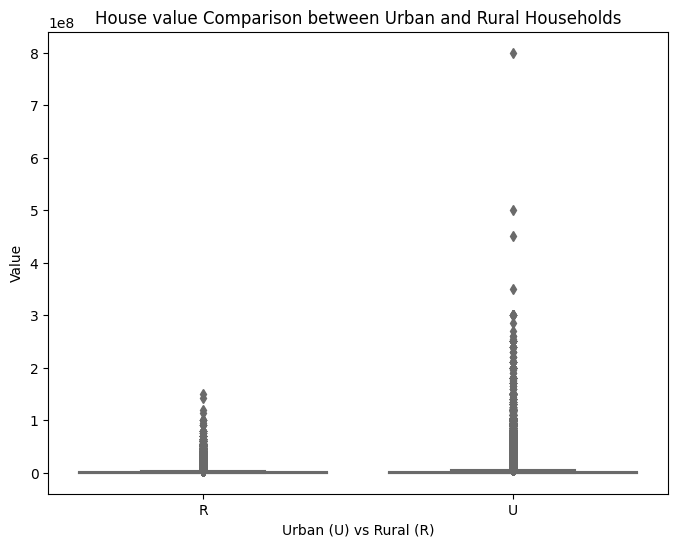

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ur', y='value', data=df_test2, palette='Set3')
plt.title('House value Comparison between Urban and Rural Households')
plt.xlabel('Urban (U) vs Rural (R)')
plt.ylabel('Value')
plt.show()


In [20]:
batch_1 = house_R['value']
batch_2 = house_U['value']

# perform mann whitney test 
stat, p_value = mannwhitneyu(batch_1, batch_2) 
print('statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.05
# conclusion 
if p_value < alpha: 
	print('Reject Null Hypothesis (Significant difference between two samples)') 
else: 
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')


statistics=46041684151.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> گزارش آزمون فرض</div>


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که آیا به طور میانگین تفاوت مشهودی میان ارزش خانه های شهری و روستایی مشاهده میکنید یا خیر. با توجه به اینکه داده ها توزیع نرمالی نداشتند ، از آزمون فرض U استفاده  کرده ایم. نتایج این آزمون به شرح زیر است :
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (U-statistic):</strong> <span style="color: #e74c3c;">46041684151</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">0</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که فرض بیان شده رد می‌شود. به عبارت دیگر، اختلاف معنی‌داری بین میانگین ارزش خانه های شهری و روستایی وجود دارد.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (U-statistic) نیز نشان می‌دهد که اختلاف میانگین ارزش خانه های شهری و روستایی بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که ارزش خانه های شهری به طور قابل توجهی بیشتر از ارزش خانه های روستایی است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که ارزش خانه های شهری و روستایی برابر نیستند و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تست فرض سوم </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


- <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> از آنجا که در پرسشنامه بخش میزان تحصیلات شامل گزینه‌ی "سایر" بود، دو حالت که "سایر" شامل مدارک دانشگاهی می‌شود و نمی‌شود را بررسی میکنیم </div>


In [21]:
df=pd.read_csv('df_test3.csv')
df2=df.copy()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [22]:
df.head()


,Address,income,state
0,10001000108,1.960000e+09,True
1,10001000111,1.800000e+09,False
2,10001000113,3.552000e+09,True
3,10001000114,1.440000e+08,False
4,10001000116,2.616000e+09,False


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> ایجاد لیست های مدارک دانشگاهی </div>


In [23]:
university_degrees = ['Bachelor', 'Master', 'PhD']
university_degrees2 = ['Bachelor', 'Master', 'PhD','other']



### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> اجرای آزمون فرض </div>


- <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی حالت اول</div>


In [24]:
# for "other" not considered as a university degree
uni = df[df['state'] == True]['income']
non_uni= df[df['state'] == False]['income']


t_stat, p_value = stats.ttest_ind(uni, non_uni)


print(f"T-statistics: {t_stat}")
print(f"P-value: {p_value}")


if p_value < 0.05:
    print("There is a significant difference in annual income between the groups.")
else:
    print("There is no significant difference in annual income between the groups.")


T-statistics: 14.206100319926804
P-value: 9.392913056568943e-46
There is a significant difference in annual income between the groups.


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که آیا درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری برابر است یا خیر. برای این منظور، از آزمون t دو نمونه‌ای مستقل استفاده کردیم. نتایج این آزمون به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (T-statistic):</strong> <span style="color: #e74c3c;">14.20</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">9.39e-46</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که اختلاف معنی‌داری بین درآمد سالانه افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند، وجود دارد.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (T-statistic) نیز نشان می‌دهد که اختلاف درآمد میان افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که درآمد افرادی که به دانشگاه رفته اند بسیار بیشتر از درآمد افرادی است که به دانشگاه نرفته اند.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که مجموع درآمد سالانه افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند برابر نبوده و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>


- <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی حالت دوم </div>


In [25]:
# for "other" considered as a university degree
unii = df2[df2['state'] == True]['income']
non_unii= df2[df2['state'] == False]['income']

t_stat, p_value = stats.ttest_ind(unii, non_unii)


print(f"T-statistics: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in annual income between the two groups.")
else:
    print("There is no significant difference in annual income between the two groups.")


T-statistics: 14.206100319926804
P-value: 9.392913056568943e-46
There is a significant difference in annual income between the two groups.


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که آیا میان مجموع درآمد سالانه افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند تفاوت
معناداری وجود دارد یا خیر. برای این منظور، از آزمون t دو نمونه‌ای مستقل استفاده کردیم. نتایج این آزمون به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (T-statistic):</strong> <span style="color: #e74c3c;">14.20</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">9.39e-46</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که اختلاف معنی‌داری بین درآمد سالانه افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند، وجود دارد.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (T-statistic) نیز نشان می‌دهد که اختلاف درآمد میان افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که درآمد افرادی که به دانشگاه رفته اند بسیار بیشتر از درآمد افرادی است که به دانشگاه نرفته اند.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که مجموع درآمد سالانه افرادی که به دانشگاه رفته اند و افرادی که به دانشگاه نرفته اند برابر نبوده و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تست فرض چهارم </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [26]:
df_test4=pd.read_csv('df_test4.csv')


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [27]:
df_test4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63950 entries, 0 to 63949
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  63950 non-null  int64  
 1   member   63950 non-null  float64
 2   income   63950 non-null  float64
 3   year     63950 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 2.0 MB


In [28]:
df_test4.describe()


,Address,member,income,year
count,6.395000e+04,63950.000000,6.395000e+04,63950.000000
mean,1.154435e+10,1.674605,7.244200e+08,1400.507975
std,8.871642e+08,1.057036,2.567117e+09,0.499940
min,1.000100e+10,0.000000,0.000000e+00,1400.000000
25%,1.081310e+10,1.000000,1.000000e+07,1400.000000
50%,1.150619e+10,1.000000,4.200000e+08,1401.000000
75%,1.230128e+10,2.000000,8.400000e+08,1401.000000
max,1.300638e+10,11.000000,2.702800e+11,1401.000000


In [29]:
df_test4.isna().sum()


Address    0
member     0
income     0
year       0
dtype: int64

In [30]:
income_1400 = df_test4[df_test4.year == 1400].income
income_1401 = df_test4[df_test4.year == 1401].income
income_1400


0        630000000.0
1                0.0
2                0.0
3                0.0
4                0.0
            ...     
31460    180000000.0
31461    744000000.0
31462    288000000.0
31463    660000000.0
31464     30000000.0
Name: income, Length: 31465, dtype: float64

In [31]:
income_1401


31465    1.547000e+07
31466    5.470000e+06
31467    7.470000e+06
31468    3.000000e+06
31469    2.000000e+06
             ...     
63945    2.269500e+08
63946    5.998950e+08
63947    1.393600e+09
63948    3.098250e+08
63949    7.764000e+08
Name: income, Length: 32485, dtype: float64

In [32]:
mean_income_1400 = income_1400.mean()
mean_income_1401 = income_1401.mean()

print('Mean Income in 1400: ', mean_income_1400)
print('Mean Income in 1401: ', mean_income_1401)


Mean Income in 1400:  532488969.33621484
Mean Income in 1401:  910324607.1138064


In [33]:
median_income_1400 = income_1400.median()
median_income_1401 = income_1401.median()

print('Median Income in 1400: ', median_income_1400)
print('Median Income in 1401: ', median_income_1401)


Median Income in 1400:  240000000.0
Median Income in 1401:  620000000.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار مقایسه درآمد </div>


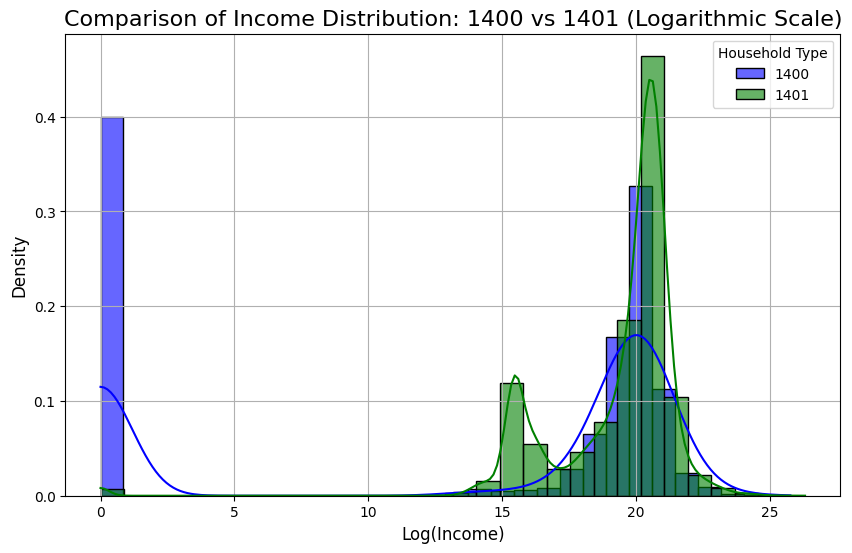

In [34]:
plt.figure(figsize=(10,6))
income_log_1400 = np.log1p(income_1400)
income_log_1401 = np.log1p(income_1401)
sns.histplot(income_log_1400, color='blue', kde=True, label='1400', stat='density', bins=30, alpha=0.6)
sns.histplot(income_log_1401, color='green', kde=True, label='1401', stat='density', bins=30, alpha=0.6)
plt.title('Comparison of Income Distribution: 1400 vs 1401 (Logarithmic Scale)', fontsize=16)
plt.xlabel('Log(Income)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Household Type")
plt.grid(True)
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> اجرای تست فرض </div>


In [35]:
stat_1400, p_1400 = shapiro(income_1400)
stat_1401, p_1401 = shapiro(income_1401)

print(f"1400: stat = {stat_1400}, p_value = {p_1400}")
print(f"1401: stat = {stat_1401}, p_value = {p_1401}")


1400: stat = 0.1461222767829895, p_value = 0.0
1401: stat = 0.17333418130874634, p_value = 0.0


c:\Users\Mahdi Asadi\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [36]:
u_stat, p_value = mannwhitneyu(income_1400, income_1401, alternative='greater')
print(f"stat = {u_stat}, p_value = {p_value}")


stat = 322775883.0, p_value = 1.0


In [37]:
t_stat, p_value = ttest_ind(income_1400, income_1401)
print(f"stat = {t_stat}, p_value = {p_value}")


stat = -18.65811329034589, p_value = 1.744238150544083e-77


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی رویکرد دوم </div>


In [38]:
data_1400 = df_test4[df_test4['year'] == 1400]['income']
data_1401 = df_test4[df_test4['year'] == 1401]['income']

mean_1400 = data_1400.mean()
mean_1401 = data_1401.mean()
std_1400 = data_1400.std(ddof=1) 
std_1401 = data_1401.std(ddof=1)

n_1400 = len(data_1400)
n_1401 = len(data_1401)

t_statistic, p_value = stats.ttest_ind(data_1401, data_1400, alternative='greater')

alpha = 0.05

print(f'Mean Income 1400: {mean_1400}')
print(f'Mean Income 1401: {mean_1401}')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis: There is sufficient evidence that income increased in 1401.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence that income increased in 1401.")


Mean Income 1400: 532488969.33621484
Mean Income 1401: 910324607.1138064
T-statistic: 18.65811329034589
P-value: 8.721190752720414e-78
Reject the null hypothesis: There is sufficient evidence that income increased in 1401.


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که فردی ادعا میکند که میزان درآمد افراد شهری در سال 1401 نسبت به سال 1400 افزایش یافته است و بنابراین؛ افراد شهری در سال 1401 ، زندگی بهتری را نسبت به سال 1400 تجربه کرده اند یا خیر. برای این منظور، از آزمون t دو نمونه‌ای مستقل استفاده کردیم. نتایج این آزمون به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (T-statistic):</strong> <span style="color: #e74c3c;">18.66</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">8.72e-78</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که اختلاف معنی‌داری بین درآمد افراد شهری نسبت به سال 1400 در سال 1401 وجود دارد..
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (T-statistic) نیز نشان می‌دهد که اختلاف درآمد میان افراد شهری نسبت به سال 1400 در سال 1401 بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که درآمد افراد شهری نسبت به سال 1400 در سال 1401 بسیار بیشتر بوده..
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که مجموع درآمد افراد شهری نسبت به سال 1400 و 1401 برابر نبوده و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار هیستوگرام </div>


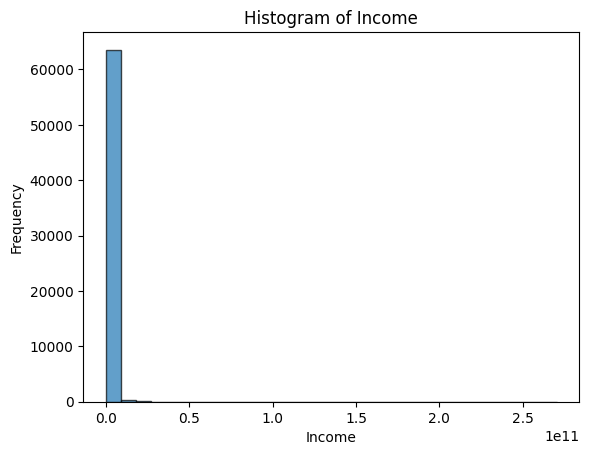

In [39]:
plt.hist(df_test4['income'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> اجرای تست فرض </div>


In [40]:
stat, p = mannwhitneyu(data_1400, data_1401, alternative='less')
print(f'Statistic: {stat}, P-value: {p}')

if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")


Statistic: 322775883.0, P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two groups.


In [41]:
t_statistic, p_value = ttest_ind(data_1400, data_1401, alternative='less')
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")


T-statistic: -18.65811329034589, P-value: 8.721190752720414e-78
Reject the null hypothesis: There is a significant difference between the two groups.


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که فردی ادعا میکند که میزان درآمد افراد شهری در سال 1401 نسبت به سال 1400 افزایش یافته است و بنابراین؛ افراد شهری در سال 1401 ، زندگی بهتری را نسبت به سال 1400 تجربه کرده اند یا خیر. برای این منظور، از آزمون t دو نمونه‌ای مستقل استفاده کردیم. نتایج این آزمون به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (T-statistic):</strong> <span style="color: #e74c3c;">-18.66</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">8.72e-78</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که اختلاف معنی‌داری بین درآمد افراد شهری نسبت به سال 1400 در سال 1401 وجود دارد..
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (T-statistic) نیز نشان می‌دهد که اختلاف درآمد میان افراد شهری نسبت به سال 1400 در سال 1401 بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که درآمد افراد شهری نسبت به سال 1400 در سال 1401 بسیار بیشتر بوده..
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که مجموع درآمد افراد شهری نسبت به سال 1400 و 1401 برابر نبوده و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>
